# Using Decision Trees for Classification (Iris Data Set)

The dataset includes three iris species with 50 samples each as well as some properties about each flower. The available columns in this dataset are: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and Species.

The main task on this dataset is to create an iris (name of a flower) classifier based on a given properties that are the sepal and petal size.

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
#uploading the Iris dataset
iris = pd.read_csv('Iris.csv')

# Previewing our Data

There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).

There are no null values, so we don't have to worry about that.

There are 50 observations of each species (setosa, versicolor, virginica).

In [3]:
#previewing our data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#basic information about our data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
#type of each column values
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [7]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#number of rows under Species column
iris['Species'].count()

150

In [10]:
#names of the unique rows under the Species column
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
#number of times the unique species appear
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
#are there any null values?
iris.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

# Data Visualization

In [13]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Applying different styles

In [24]:
plt.style.use("classic")
#plt.style.use("fivethirtyeight")
plt.style.use("ggplot")
#plt.style.use("seaborn-whitegrid")
#plt.style.use("seaborn-pastel")
#plt.style.use(["dark_background", "fivethirtyeight"])

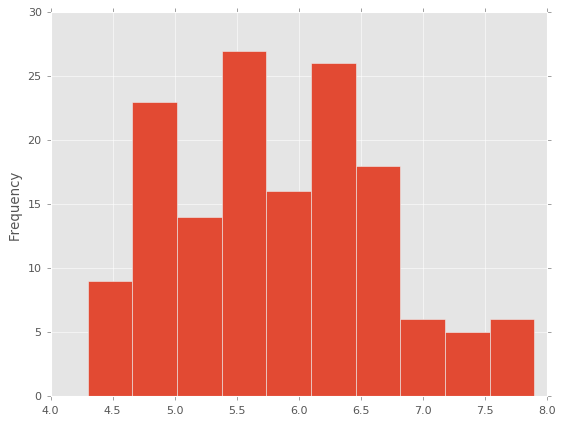

In [25]:
#histogram for Sepal length
iris['SepalLengthCm'].plot.hist()
plt.show()

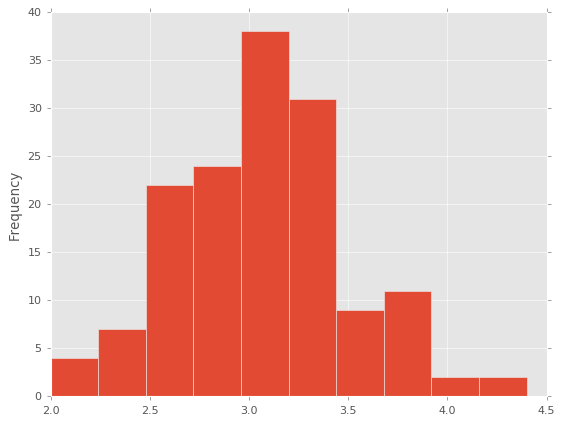

In [16]:
#histogram for Sepal Width
iris['SepalWidthCm'].plot.hist()
plt.show()

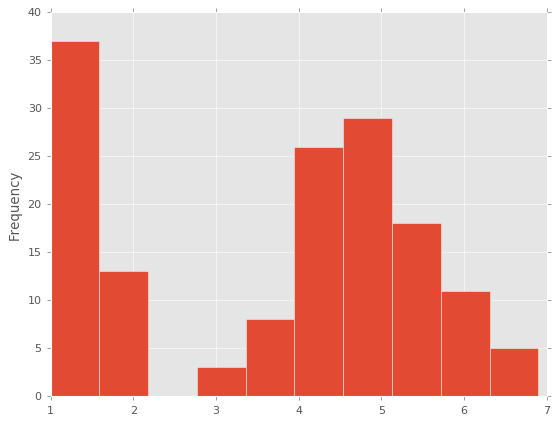

In [17]:
#histogram for Petal Length
iris['PetalLengthCm'].plot.hist()
plt.show()

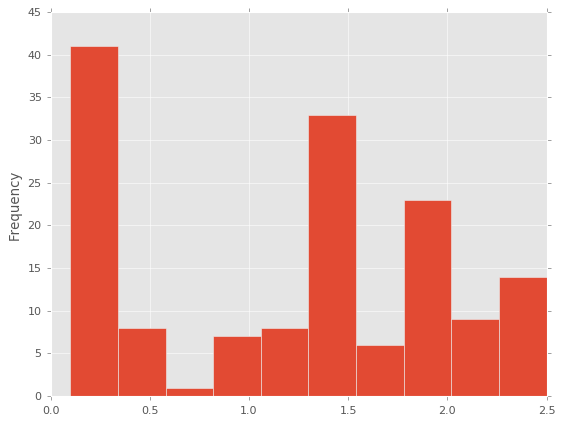

In [18]:
#histogram for Petal Width
iris['PetalWidthCm'].plot.hist()
plt.show()

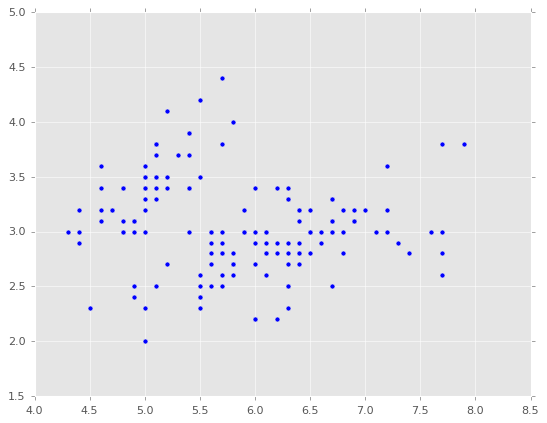

In [19]:
#scatterplot of sepal length and sepal width in matplotlib
x = iris['SepalLengthCm']
y = iris['SepalWidthCm']
plt.scatter(x, y)
plt.show()

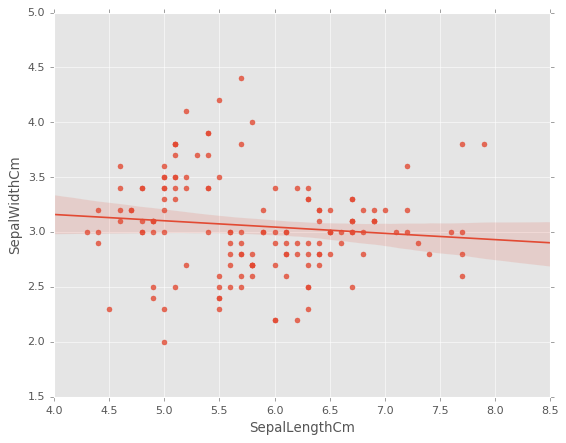

In [26]:
#scatterplot of sepal length and sepal width in seaborn
x = iris['SepalLengthCm']
y = iris['SepalWidthCm']
sns.regplot(x,y, fit_reg=True)
#fit_reg=False removes the linear regression line that is drawn by default

In [21]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
#removing the Id column since we don't need it.
del iris['Id']

In [23]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Cheking the relationships between columns using seaborn pairplots

To check the relationships we are going to use seaborn.seaborn provides us with a function called *pairplot* that plot pairwise relationships in a dataset. We can throw the whole dataframe as the parameters so that it will check relationship for each column to other columns. We can also give categorical color based on a certain column. To know whether there are outliers in our data or not we can give hue with *Species* as the parameter.

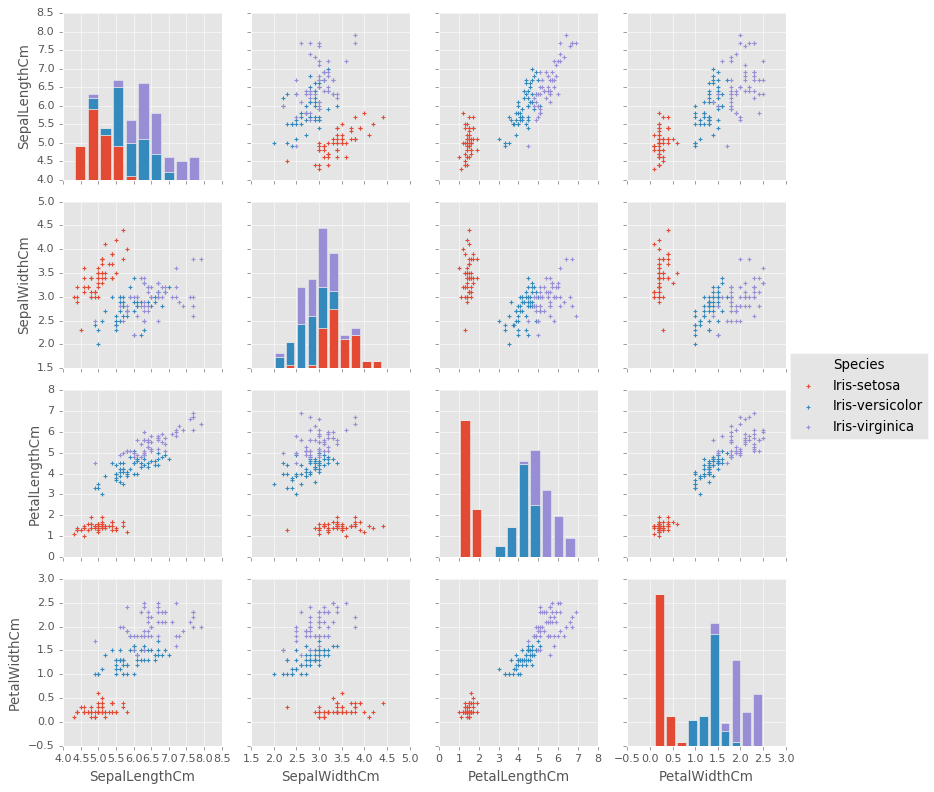

In [24]:
sns.pairplot(iris, hue='Species', markers='+')
plt.show()

# Violin Plots

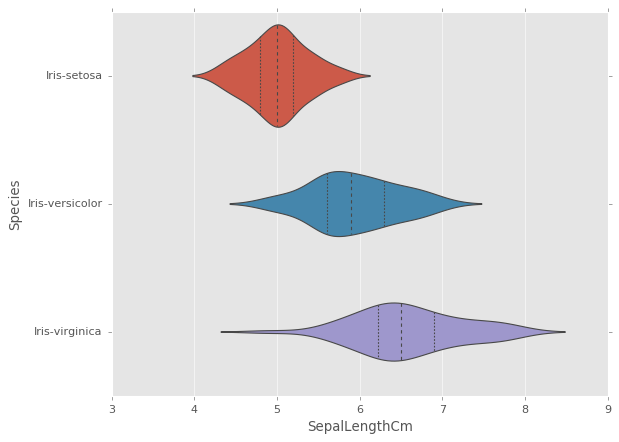

In [25]:
sns.violinplot(y = 'Species', x = 'SepalLengthCm', data = iris, inner = 'quartile')

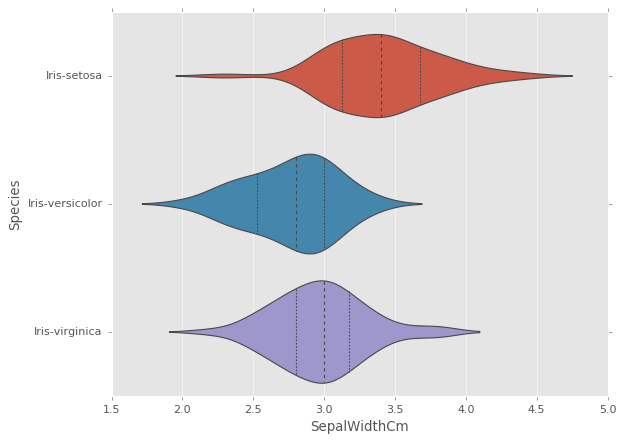

In [26]:
sns.violinplot(y='Species', x = 'SepalWidthCm', data = iris, inner = 'quartile')

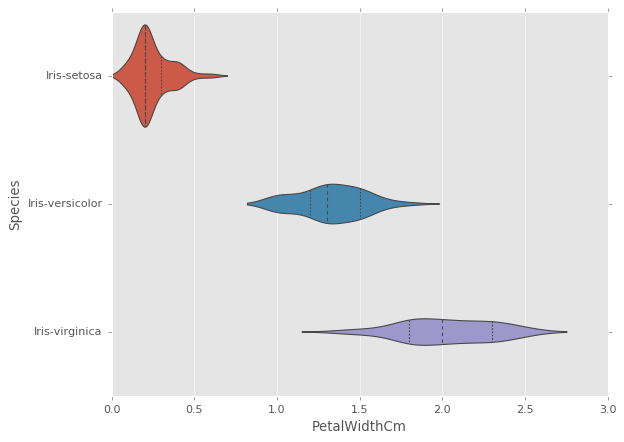

In [27]:
sns.violinplot(y = 'Species', x = 'PetalWidthCm', data = iris, inner = 'quartile')

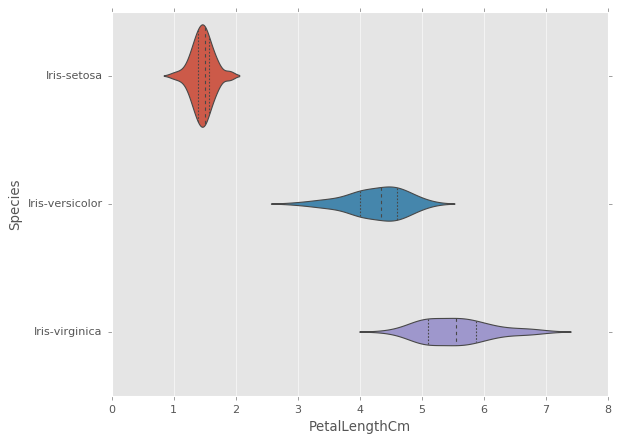

In [28]:
sns.violinplot(x = 'PetalLengthCm', y = 'Species', data = iris, inner = 'quartile')

# Swarm Plots

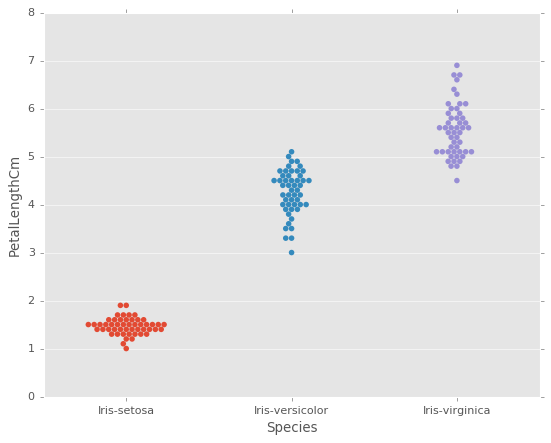

In [29]:
sns.swarmplot(x = 'Species', y = 'PetalLengthCm', data = iris)

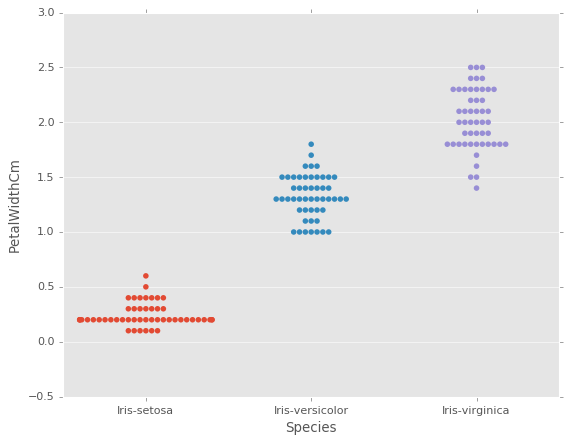

In [30]:
sns.swarmplot(x = 'Species', y = 'PetalWidthCm', data = iris)

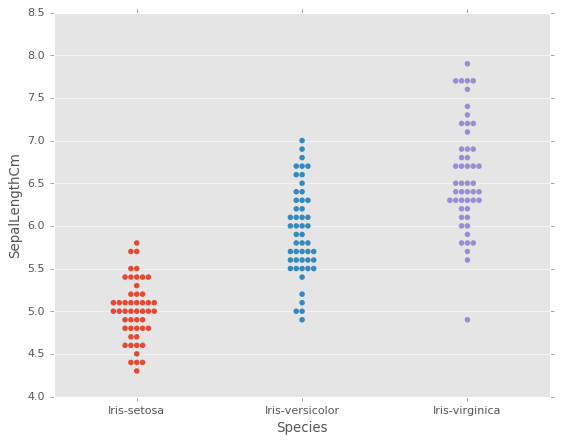

In [31]:
sns.swarmplot(x = 'Species', y = 'SepalLengthCm', data = iris)

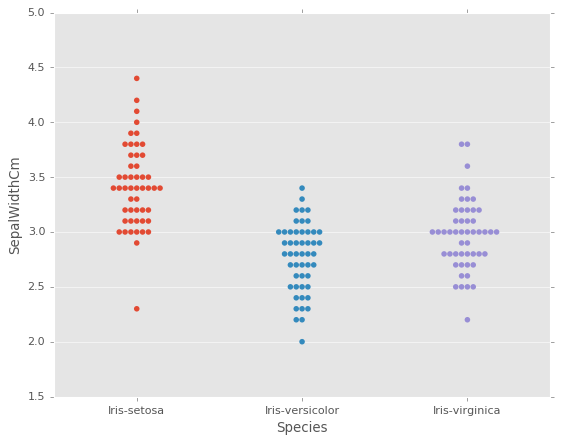

In [32]:
sns.swarmplot(x = 'Species', y = 'SepalWidthCm', data = iris)

# Splitting the Dataset

Since there is only one dataset available (no separated training and test dataset) we need to divide the dataset into training and test dataset by ourself. To do this, we can use the **train_test_split** method from the scikit-learn. Don’t forget to split the input and output column to different arrays.

In [33]:
features = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
target = iris['Species'].values

In [34]:
#features
#target

In [35]:
(train_features, test_features, train_target, test_target) = train_test_split(features, target, test_size = 0.2, random_state = 1)

I configured it to split the dataset into 80:20 for training and test dataset. I also define a **random_state** equal to 1. The usage of defining random_state is to make sure the splitted dataset is the same even if we split the dataset again and again. It is actually only used to make sure we can reproduce the exact same dataset again.

# Classification using the Decision Tree Classifier from scikit-kearn

In [36]:
cls = tree.DecisionTreeClassifier()
cls.fit(train_features, train_target)
cls.score(test_features, test_target) #accuracy of the classifier

0.9666666666666667

# Predicting a new iris flower

In [37]:
cls.predict([[1, 1, 1, 1]])

array(['Iris-versicolor'], dtype=object)

In [38]:
cls.predict([[5,2,4,1]])

array(['Iris-versicolor'], dtype=object)

In [39]:
cls.predict([[2,2,2,2]])

array(['Iris-virginica'], dtype=object)